In [9]:
import numpy as np
import matplotlib.pyplot as plt


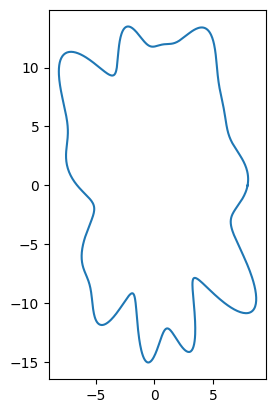

In [10]:
num_freq = 12
w_range = (-.5, .5)
resolution = 1000
base_r = 7
ellipsis_ratio = 2.


def sample_w(
    num_freq: int,
    w_range: tuple[float, float]
) -> np.ndarray:
    """
    Samples the weights
    """
    return np.random.uniform(*w_range, (1, 2 * num_freq))


def create_shape(
    num_freq: int|list[int],
    w_range: tuple[float, float],
    resolution: int,
    base_r: float,
    ellipsis_ratio: float
) -> np.ndarray:
    """
    Creates the shape(s)
    """
    is_list = isinstance(num_freq, list)
    num_freq = [num_freq] if not is_list else num_freq
    max_num_freq = max(num_freq)
    assert max(map(abs, w_range)) * max_num_freq < base_r, "Function might self-intersect"

    t = 2 * np.pi * np.linspace(0, 1, resolution)[None, :]

    angles = t * np.arange(1, max_num_freq + 1)[:, None]
    sin = np.sin(angles)
    cos = np.cos(angles)

    ws = sample_w(max_num_freq, w_range)

    shapes = np.empty((len(num_freq), 2, resolution))
    for idx, freq in enumerate(num_freq):
        masked_ws = ws.copy()
        masked_ws[
            :,
            (np.arange(2 * max_num_freq) % max_num_freq) > freq
        ] = 0
        
        r = masked_ws @ np.concat((sin, cos), axis=0) + base_r

        x = r * np.cos(t)
        y = ellipsis_ratio * r * np.sin(t)

        shapes[idx] = np.concat((x, y), axis=0)

    return shapes if is_list else shapes[0]


def display_shape(shape: np.ndarray) -> None:
    """
    Displays the shape
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.plot(*shape)
    plt.show()

shape = create_shape(num_freq, w_range, resolution, base_r, ellipsis_ratio)
display_shape(shape)
